In [1]:
import pandas as pd
import numpy as np
import json
import sklearn
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_housing = pd.read_json('train.json')
df_housing.tail()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
9999,1.0,2,297160caf8a88c10718b492d4672c6b4,2016-06-02 05:41:05,"30TH/3RD, MASSIVE CONV 2BR IN LUXURY FULL SERV...",E 30 St,"[Elevator, Laundry in Building, Laundry in Uni...",medium,40.7426,7098690,-73.9790,2a1ee03b449700c3a15dd8c9a505c525,[https://photos.renthop.com/2/7098690_18396d32...,3200,230 E 30 St
99991,1.0,1,9e871ccfea7b07686c101548ca693af6,2016-04-04 18:22:34,"HIGH END condo finishes, swimming pool, and ki...",Rector Pl,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",low,40.7102,6822449,-74.0163,ef20d40b528500037e37b167787ac089,[https://photos.renthop.com/2/6822449_b429587b...,3950,225 Rector Place
99992,1.0,1,7967a1280bf3f7644500fc79d2696b0e,2016-04-16 02:13:40,Large Renovated One Bedroom Apartment with Sta...,West 45th Street,"[Doorman, Elevator, Pre-War, Dogs Allowed, Cat...",low,40.7601,6881461,-73.9900,d889a9552265fe359e7d36d172084fcb,[https://photos.renthop.com/2/6881461_20a86530...,2595,341 West 45th Street
99993,1.0,0,ad67f6181a49bde19218929b401b31b7,2016-04-08 02:13:33,Stylishly sleek studio apartment with unsurpas...,Wall Street,"[Doorman, Elevator, Pre-War, Dogs Allowed, Cat...",low,40.7066,6841891,-74.0101,9fd3af5b2d23951e028059e8940a55d7,[https://photos.renthop.com/2/6841891_124c9c44...,3350,37 Wall Street
99994,1.0,2,5173052db6efc0caaa4d817112a70f32,2016-04-12 02:48:07,Look no further!!! This giant 2 bedroom apart...,Park Terrace East,[Hardwood Floors],low,40.8699,6858245,-73.9172,d7f57128272bfd82e33a61999b5f4c42,[https://photos.renthop.com/2/6858245_c4380bde...,2200,30 Park Terrace East


In [3]:
print("The type of df_housing is: ", type(df_housing))

print("The columns are: ", df_housing.columns.values.tolist())

print("Its shape is: ", df_housing.shape)

The type of df_housing is:  <class 'pandas.core.frame.DataFrame'>
The columns are:  ['bathrooms', 'bedrooms', 'building_id', 'created', 'description', 'display_address', 'features', 'interest_level', 'latitude', 'listing_id', 'longitude', 'manager_id', 'photos', 'price', 'street_address']
Its shape is:  (49352, 15)


**Get the details of the data**

In [4]:
df_housing.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [5]:
df_housing.index

Int64Index([    10,  10000, 100004, 100007, 100013, 100014, 100016, 100020,
            100026, 100027,
            ...
             99982,  99984,  99986,  99987,  99988,   9999,  99991,  99992,
             99993,  99994],
           dtype='int64', length=49352)

**Checking missing values for other columns**

In [6]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


** Firstly we will check the number of unique "listing_id". 
Similarly we will study the number of unique values in various other columns**

In [7]:
print("listing_id =" + str(df_housing['listing_id'].nunique()))
print("building id ="+ str(df_housing['building_id'].nunique()))
print("created="+ str(df_housing['created'].nunique()))
print("bathrooms="+str(df_housing['bathrooms'].nunique()))
print("bedrooms="+str(df_housing['bedrooms'].nunique()))
print("created ="+ str(df_housing['created'].nunique()))
print("interest_level ="+ str(df_housing['interest_level'].nunique()))
print("latitude="+ str(df_housing['latitude'].nunique()))
print("longitude ="+str(df_housing['longitude'].nunique()))
print("manager_id="+str(df_housing['manager_id'].nunique()))
print("price="+ str(df_housing['price'].nunique()))
print("display_address=" +str(df_housing['display_address'].nunique()))
print("street_address="+ str(df_housing['street_address'].nunique()))
print("manager_id="+str(df_housing['manager_id'].nunique()))


listing_id =49352
building id =7585
created=48675
bathrooms=15
bedrooms=9
created =48675
interest_level =3
latitude=2335
longitude =1677
manager_id=3481
price=2808
display_address=8826
street_address=15358
manager_id=3481


**After confirming that "listing_id" 
are unique for all 49352 entries we will make that column as the index column**

In [8]:
print(df_housing["listing_id"].unique())
housing=df_housing.set_index(["listing_id"]).sort_index()
housing

[7211212 7150865 6887163 ..., 6881461 6841891 6858245]


,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,longitude,manager_id,photos,price,street_address
listing_id,,,,,,,,,,,,,,
6811957,1.0,1,2a21319016fe50100e0b8ebb5a4f9cf0,2016-04-01 22:12:41,X-LARGE Flex 1BR Loft! ~~ PRIME Greenwich Vill...,Astor Place,"[Doorman, Elevator, Laundry In Building]",high,40.7302,-73.9924,f07272f8ceb99db4c1a7cbbd9ae7b75b,[https://photos.renthop.com/2/6811957_3dad56e8...,3195,1 Astor Place
6811965,1.0,0,104bfeddd65a0890b071c3a09cf81704,2016-04-01 22:56:00,"This Enormous Studio Features: Harwood Floors,...",East 54th Street,"[Cats Allowed, Dogs Allowed, No Fee, Laundry I...",medium,40.7576,-73.9677,3b630ec9cb6eee53b92cfac7f42e3bf4,[https://photos.renthop.com/2/6811965_b8f942e6...,2000,230 East 54th Street
6811966,2.0,3,8775706158cbc96d12dd441d42e11deb,2016-04-01 22:57:15,--- East 31st St & Lexington Avenue --- This S...,East 31st St & Lexington Avenue,"[Common Outdoor Space, Cats Allowed, Private O...",high,40.7388,-73.9851,3b630ec9cb6eee53b92cfac7f42e3bf4,[https://photos.renthop.com/2/6811966_8b83c24d...,5850,105 Lexington Avenue
6811973,1.0,1,bc4e62116277654d4df66ab77a1152f8,2016-04-01 23:26:07,Reduced Fee!! Priced To Rent!\rLarge Newly Upd...,West End Ave,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",medium,40.7939,-73.9738,262471a6a678adb458e879b092b23b4b,[https://photos.renthop.com/2/6811973_c87c8f6d...,2745,700 West End Ave
6811975,1.0,1,18c5b031bad8cef779efa7e2398a42a3,2016-04-02 00:48:13,Phenomenal deal of the century!! This spacious...,E 88th street,"[Cats Allowed, Dogs Allowed, Doorman, Elevator...",medium,40.7784,-73.9491,7c5e4fc025b70c6540d6b0e06716b9dd,[https://photos.renthop.com/2/6811975_370cb787...,2400,401 E 88th street
6812000,1.0,1,0,2016-04-02 01:11:13,"Just in time for enjoying Spring/Summer, this ...",Rector Place,"[Swimming Pool, Doorman, Fitness Center, Dogs ...",low,40.7091,-74.0182,4ccafba721db54b92d97c0af85847c02,[https://photos.renthop.com/2/6812000_ba779a72...,3650,380 Rector Place
6812002,1.0,2,0,2016-04-02 01:11:30,photos coming soon...............................,East 21st Street,"[Pre-War, Dogs Allowed, Cats Allowed]",low,40.7366,-73.9826,92343a6bd78f22d6968260f85ee79c2d,[],3150,240 East 21st Street
6812004,1.0,1,0,2016-04-02 01:11:31,"NO FEE Recently renovated, the oversized apart...",First Avenue,"[Fitness Center, Pre-War, No Fee, Dogs Allowed...",low,40.7318,-73.9822,d24abc331d8b47f73a369795690c010a,[https://photos.renthop.com/2/6812004_6ddab1c0...,3325,252 First Avenue
6812005,1.0,1,0,2016-04-02 01:11:34,This is a steal in the heart of East Village!!...,East 12th Street,"[Pre-War, Dogs Allowed, Cats Allowed]",low,40.7314,-73.9864,456089ec27510652ee3878a399ed56e0,[],2795,233 East 12th Street


** NOT WORKING**

In [9]:
#print(df_housing['features'].nunique())
#print(df_housing['photos'].nunique())
#print(df_housing['description'].nunique())
print("type of features is "+ str(type(df_housing.features)))
print("type of photos is "+ str(type(df_housing.photos)))
print("type of description is "+ str(type(df_housing.description)))


type of features is <class 'pandas.core.series.Series'>
type of photos is <class 'pandas.core.series.Series'>
type of description is <class 'pandas.core.series.Series'>


**min and max no of elements in each array
determine which are empty
represent photos using matrix**


**1. We will try to study the target variable "interest_level"**

In [10]:
#count of various interest levels
housing.groupby(['interest_level']).size()

interest_level
high       3839
low       34284
medium    11229
dtype: int64

In [11]:
#Replace all the "high","medium"and low by 2,1 and 0
d = {'high':2,'medium':1,'low':0}
housing['interest_level']=housing['interest_level'].map(d)
housing['interest_level']

listing_id
6811957    2
6811965    1
6811966    2
6811973    1
6811975    1
6812000    0
6812002    0
6812004    0
6812005    0
6812009    0
6812025    1
6812033    0
6812048    0
6812054    0
6812061    0
6812062    0
6812064    0
6812083    0
6812086    0
6812103    0
6812107    0
6812112    0
6812113    0
6812120    0
6812122    0
6812133    0
6812142    0
6812150    0
6812154    0
6812160    0
          ..
7670814    0
7670822    0
7670925    0
7675630    0
7675773    0
7675782    0
7675946    0
7680982    0
7681003    0
7681171    0
7688092    0
7688495    0
7694111    0
7694125    0
7694132    0
7699396    0
7707466    0
7707521    0
7714331    0
7714547    0
7724437    0
7724549    0
7724814    0
7724905    0
7731142    0
7731327    0
7742631    0
7742670    0
7742803    0
7753784    0
Name: interest_level, dtype: int64

In [12]:
# Verify that the contents of feature column is numeric
housing.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,longitude,manager_id,photos,price,street_address
listing_id,,,,,,,,,,,,,,
6811957,1.0,1,2a21319016fe50100e0b8ebb5a4f9cf0,2016-04-01 22:12:41,X-LARGE Flex 1BR Loft! ~~ PRIME Greenwich Vill...,Astor Place,"[Doorman, Elevator, Laundry In Building]",2,40.7302,-73.9924,f07272f8ceb99db4c1a7cbbd9ae7b75b,[https://photos.renthop.com/2/6811957_3dad56e8...,3195,1 Astor Place
6811965,1.0,0,104bfeddd65a0890b071c3a09cf81704,2016-04-01 22:56:00,"This Enormous Studio Features: Harwood Floors,...",East 54th Street,"[Cats Allowed, Dogs Allowed, No Fee, Laundry I...",1,40.7576,-73.9677,3b630ec9cb6eee53b92cfac7f42e3bf4,[https://photos.renthop.com/2/6811965_b8f942e6...,2000,230 East 54th Street
6811966,2.0,3,8775706158cbc96d12dd441d42e11deb,2016-04-01 22:57:15,--- East 31st St & Lexington Avenue --- This S...,East 31st St & Lexington Avenue,"[Common Outdoor Space, Cats Allowed, Private O...",2,40.7388,-73.9851,3b630ec9cb6eee53b92cfac7f42e3bf4,[https://photos.renthop.com/2/6811966_8b83c24d...,5850,105 Lexington Avenue
6811973,1.0,1,bc4e62116277654d4df66ab77a1152f8,2016-04-01 23:26:07,Reduced Fee!! Priced To Rent!\rLarge Newly Upd...,West End Ave,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",1,40.7939,-73.9738,262471a6a678adb458e879b092b23b4b,[https://photos.renthop.com/2/6811973_c87c8f6d...,2745,700 West End Ave
6811975,1.0,1,18c5b031bad8cef779efa7e2398a42a3,2016-04-02 00:48:13,Phenomenal deal of the century!! This spacious...,E 88th street,"[Cats Allowed, Dogs Allowed, Doorman, Elevator...",1,40.7784,-73.9491,7c5e4fc025b70c6540d6b0e06716b9dd,[https://photos.renthop.com/2/6811975_370cb787...,2400,401 E 88th street


In [13]:
# Verify that the count of "high","medium"and low matches the count of  2,1 and 0
grouped_interest_level = housing.groupby(['interest_level']).size()
grouped_interest_level

interest_level
0    34284
1    11229
2     3839
dtype: int64

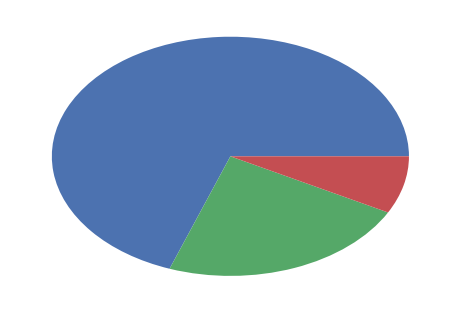

In [14]:
plt.pie(grouped_interest_level)
plt.show()

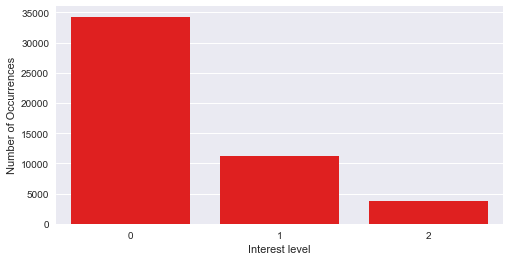

In [15]:
int_level = housing['interest_level'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values,color='red')
plt.ylabel('Number of Occurrences')
plt.xlabel('Interest level')
plt.show()

From the above graph it is clear that very few listings have a high interest level and most entries have low interest levels
'high':2,'medium':1,'low':0

**2. Studying the latitude and longitude **

In [16]:
print("The values of latitude vary from " + str(housing["latitude"].min()) + " to " + str(housing["latitude"].max()))

print("The values of latitude vary from " + str(housing["longitude"].min()) + " to " + str(housing["longitude"].max()))


The values of latitude vary from 0.0 to 44.8835
The values of latitude vary from -118.271 to 0.0


Now we want to study the distribution of the latitude and longitude data, so we will plot histograms 
for those columns.

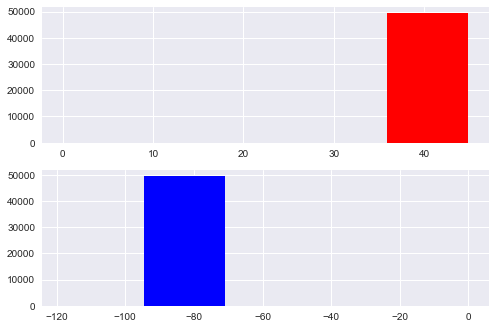

In [17]:
plt.subplot(2,1,1)
plt.hist(housing["latitude"],bins=5,color="red")
plt.subplot(2,1,2)
plt.hist(housing["longitude"],bins=5,color="blue")

plt.show()

In [18]:
housing['latitude'].unique()

array([ 40.7302,  40.7576,  40.7388, ...,  40.6282,  40.6489,  40.6287])

In [38]:
housing.sort("latitude").head(20)

C:\Users\avant\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,longitude,manager_id,photos,price,street_address,num_features,num_photos
listing_id,,,,,,,,,,,,,,,,
7062134,1.0,2,55ab81a4ccd5ea862fba344dc29f1463,2016-05-24 17:43:39,Fantastic 2 bed with the works! It has 2 queen...,118 W 109th,"[Cats Allowed, Dogs Allowed, No Fee, Laundry i...",0,0.0000,0.0000,91c09ae8bfdc7e5ba7d6385e33a6064d,[https://photos.renthop.com/2/7062134_mb_9f18c...,3200,118 W 109th,4,6
6991901,1.0,1,4d7c804afea366c666731bee9c56919e,2016-05-10 14:30:12,NO FEE! Spacious one bedroom apartment in a F...,west 87,"[Doorman, Fitness Center, No Fee, Cats Allowed...",0,0.0000,0.0000,7d4f285c15b11c61bacfbf8e7a49252d,[https://photos.renthop.com/2/6991901_mb_e3232...,3600,247 west 87,7,11
7087715,1.0,1,1490317c3a31185f0c8115f01d1acc5b,2016-05-31 22:26:06,Gorgeous one bedroom in Sunset Park-Private en...,"Sunset Park, Brooklyn","[hardwood floors, own entrance, oak cabinets]",0,0.0000,0.0000,2290f91e45472ecaf0983c5af18098ce,[https://photos.renthop.com/2/7087715_mb_3517f...,1750,145 28 Street,3,8
7174094,1.0,2,a1b2bd0758c6f14be815e4d9382b8169,2016-06-16 15:38:11,Flatiron Duplex!At the intersection of Flatiro...,"Flatiron, Kips Bay, Gramercy","[Views, No Fee, Duplex, Laundry in Unit, Cats ...",0,0.0000,0.0000,42cb18c3898c42b7512065e7d3e1e8bd,[https://photos.renthop.com/2/7174094_mb_e3c7e...,4395,219 E 28th,8,5
7094527,1.0,1,0,2016-06-01 19:59:46,Big 2 bedroom in clean and quite multi family ...,88 van Sicklen street,"[Reduced Fee, Cats Allowed]",0,0.0000,0.0000,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7094527_mb_7f196...,1725,Van Sicklen street,2,8
6888639,5.0,6,0,2016-04-18 02:14:51,***NO BROKER FEE***<BR><BR>Situated on a gorge...,Decatur Street,"[Garden/Patio, Terrace, No Fee, Outdoor Space,...",0,0.0000,0.0000,c639a76f31c41923cd91d23875a72264,[https://photos.renthop.com/2/6888639_87eb648f...,9995,259 Decatur Street,6,6
6981091,1.0,2,8f837ada8d7ec5d251a369cd5909af7c,2016-05-07 08:15:32,Spacious and bright 2 bedroom fully renovated ...,Madison Ave,"[Laundry in Unit, Roof Deck, <null>]",1,0.0000,0.0000,b93b333035403fc090fb51372fb082f9,[https://photos.renthop.com/2/6981091_mb_efd73...,2950,1632 Madison Ave,3,7
6896885,1.0,0,a742bc8b82eedb42a3d5111d62dd843b,2016-04-19 12:16:43,Gorgeous sunny studio in Midtown East with an ...,e. 53 St,[],0,0.0000,0.0000,b93b333035403fc090fb51372fb082f9,[https://photos.renthop.com/2/6896885_mb_48518...,1850,338 e. 53,0,3
6997950,4.0,3,f389c8eb16e5d0c771615fb30f3cc9d6,2016-05-11 18:07:15,"This high floor, mint condition, corner unit b...",450 East 83rd Street apt 21D (Furnished),"[Furnished, Laundry In Unit, Cats Allowed, Dog...",0,0.0000,0.0000,355ccd9223a7481c5d223d39b4e65e90,[https://photos.renthop.com/2/6997950_4ef02f8c...,16500,450 East 83rd Street,13,10


From the above analysis we notice that there are a few listing id where both latitude and longitude are 000.
By sorting the dataframe on basis of "latitude" we notice that there are 12 such entries.
WE can choose to ignore these 12 entries and hence the range for latitude becomes :34.0126 to 44.8835 
and the range for longitude becomes :-118.2710 to -70.9846

** 3. Now we will try to understand the duration within which the listings were made.**

In [20]:
# Find the time over which the listings were made
least_recent_date = housing['created'].min()
print("least_recent_date" + str(least_recent_date))
recent_date = housing['created'].max()
print("recent_date" + str(recent_date))
# Thus we notice that the listings were made between 04/01/2016 to 06/29/2016

least_recent_date2016-04-01 22:12:41
recent_date2016-06-29 21:41:47


**4. Now we will try to study the column "features"**

In [39]:

housing["num_features"] = housing["features"].apply(len)
housing["num_features"]
housing[housing.num_features>0]


,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,longitude,manager_id,photos,price,street_address,num_features,num_photos
listing_id,,,,,,,,,,,,,,,,
6811957,1.0,1,2a21319016fe50100e0b8ebb5a4f9cf0,2016-04-01 22:12:41,X-LARGE Flex 1BR Loft! ~~ PRIME Greenwich Vill...,Astor Place,"[Doorman, Elevator, Laundry In Building]",2,40.7302,-73.9924,f07272f8ceb99db4c1a7cbbd9ae7b75b,[https://photos.renthop.com/2/6811957_3dad56e8...,3195,1 Astor Place,3,5
6811965,1.0,0,104bfeddd65a0890b071c3a09cf81704,2016-04-01 22:56:00,"This Enormous Studio Features: Harwood Floors,...",East 54th Street,"[Cats Allowed, Dogs Allowed, No Fee, Laundry I...",1,40.7576,-73.9677,3b630ec9cb6eee53b92cfac7f42e3bf4,[https://photos.renthop.com/2/6811965_b8f942e6...,2000,230 East 54th Street,4,2
6811966,2.0,3,8775706158cbc96d12dd441d42e11deb,2016-04-01 22:57:15,--- East 31st St & Lexington Avenue --- This S...,East 31st St & Lexington Avenue,"[Common Outdoor Space, Cats Allowed, Private O...",2,40.7388,-73.9851,3b630ec9cb6eee53b92cfac7f42e3bf4,[https://photos.renthop.com/2/6811966_8b83c24d...,5850,105 Lexington Avenue,9,7
6811973,1.0,1,bc4e62116277654d4df66ab77a1152f8,2016-04-01 23:26:07,Reduced Fee!! Priced To Rent!\rLarge Newly Upd...,West End Ave,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",1,40.7939,-73.9738,262471a6a678adb458e879b092b23b4b,[https://photos.renthop.com/2/6811973_c87c8f6d...,2745,700 West End Ave,7,5
6811975,1.0,1,18c5b031bad8cef779efa7e2398a42a3,2016-04-02 00:48:13,Phenomenal deal of the century!! This spacious...,E 88th street,"[Cats Allowed, Dogs Allowed, Doorman, Elevator...",1,40.7784,-73.9491,7c5e4fc025b70c6540d6b0e06716b9dd,[https://photos.renthop.com/2/6811975_370cb787...,2400,401 E 88th street,7,7
6812000,1.0,1,0,2016-04-02 01:11:13,"Just in time for enjoying Spring/Summer, this ...",Rector Place,"[Swimming Pool, Doorman, Fitness Center, Dogs ...",0,40.7091,-74.0182,4ccafba721db54b92d97c0af85847c02,[https://photos.renthop.com/2/6812000_ba779a72...,3650,380 Rector Place,5,5
6812002,1.0,2,0,2016-04-02 01:11:30,photos coming soon...............................,East 21st Street,"[Pre-War, Dogs Allowed, Cats Allowed]",0,40.7366,-73.9826,92343a6bd78f22d6968260f85ee79c2d,[],3150,240 East 21st Street,3,0
6812004,1.0,1,0,2016-04-02 01:11:31,"NO FEE Recently renovated, the oversized apart...",First Avenue,"[Fitness Center, Pre-War, No Fee, Dogs Allowed...",0,40.7318,-73.9822,d24abc331d8b47f73a369795690c010a,[https://photos.renthop.com/2/6812004_6ddab1c0...,3325,252 First Avenue,5,5
6812005,1.0,1,0,2016-04-02 01:11:34,This is a steal in the heart of East Village!!...,East 12th Street,"[Pre-War, Dogs Allowed, Cats Allowed]",0,40.7314,-73.9864,456089ec27510652ee3878a399ed56e0,[],2795,233 East 12th Street,3,0


In [22]:
#count the number of listings with zero features listed.
housing[housing.num_features ==0].count()


bathrooms          3218
bedrooms           3218
building_id        3218
created            3218
description        3218
display_address    3218
features           3218
interest_level     3218
latitude           3218
longitude          3218
manager_id         3218
photos             3218
price              3218
street_address     3218
num_features       3218
dtype: int64

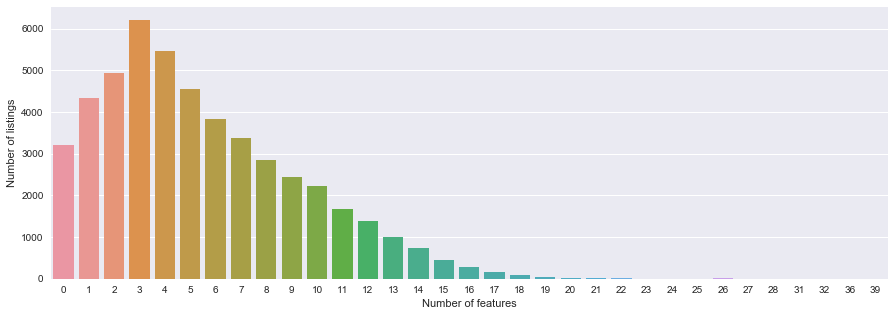

In [23]:
features = housing['num_features'].value_counts()

plt.figure(figsize=(15,5))
sns.barplot(features.index, features.values)
plt.ylabel('Number of listings')
plt.xlabel('Number of features')
plt.show()

Thus from the above graph and code we can notice that there are 3218 entries (approx 6.5 % entries)
where there are no features mentioned in the listing.

**5.Similarly We will work for photos**

In [24]:
housing["num_photos"] = housing["photos"].apply(len)
housing["num_photos"]
housing[housing.num_photos ==0]

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,longitude,manager_id,photos,price,street_address,num_features,num_photos
listing_id,,,,,,,,,,,,,,,,
6812002,1.0,2,0,2016-04-02 01:11:30,photos coming soon...............................,East 21st Street,"[Pre-War, Dogs Allowed, Cats Allowed]",0,40.7366,-73.9826,92343a6bd78f22d6968260f85ee79c2d,[],3150,240 East 21st Street,3,0
6812005,1.0,1,0,2016-04-02 01:11:34,This is a steal in the heart of East Village!!...,East 12th Street,"[Pre-War, Dogs Allowed, Cats Allowed]",0,40.7314,-73.9864,456089ec27510652ee3878a399ed56e0,[],2795,233 East 12th Street,3,0
6812025,1.0,0,0,2016-04-02 01:12:21,,Saint Nicholas Avenue,[Pre-War],1,40.8314,-73.9409,e6472c7237327dd3903b3d6f6a94515a,[],1370,920 Saint Nicholas Avenue,1,0
6812062,1.0,0,0,2016-04-02 01:13:56,NO FEE! The prestigious Herald Towers are loca...,West 34th Street,"[Fitness Center, Pre-War, Dogs Allowed, Cats A...",0,40.7494,-73.9875,1a79c79b0366512deaa5053ae501964b,[],2575,50 West 34th Street,4,0
6812086,1.0,1,0,2016-04-02 01:14:55,Currently occupied - sorry.Appointments only. ...,East 37th Street,[Pre-War],0,40.7476,-73.9760,cc2daf38b6f1d076e75c6cdd062da612,[],2875,207-215 East 37th Street,1,0
6812120,1.0,0,0,2016-04-02 01:16:56,BRAND NEW ON THE MARKET..........................,East 80th Street,[],0,40.7746,-73.9554,e50d99e3da5ad420b1c2eb06309ad061,[],2095,229 East 80th Street,0,0
6812133,1.0,0,0,2016-04-02 01:17:28,Great studio apartment available for an immedi...,East 56th Street,"[Doorman, Fitness Center, Dogs Allowed, Cats A...",0,40.7602,-73.9689,048ff8c9b8a4831e117e113d3cc5926b,[],2750,141 East 56th Street,4,0
6812160,1.0,2,0,2016-04-02 01:18:25,,East 78th Street,"[Dogs Allowed, Cats Allowed]",0,40.7730,-73.9558,5511bb6c502eaf88b51bac57f7ad0be7,[],2995,265 East 78th Street,2,0
6812162,1.0,2,0,2016-04-02 01:18:26,Large true 2 bedroom available for rent on Bro...,Broadway,[Doorman],0,40.8198,-73.9578,73799990574344ce3454c3b25db1d87d,[],2595,3333 Broadway,1,0


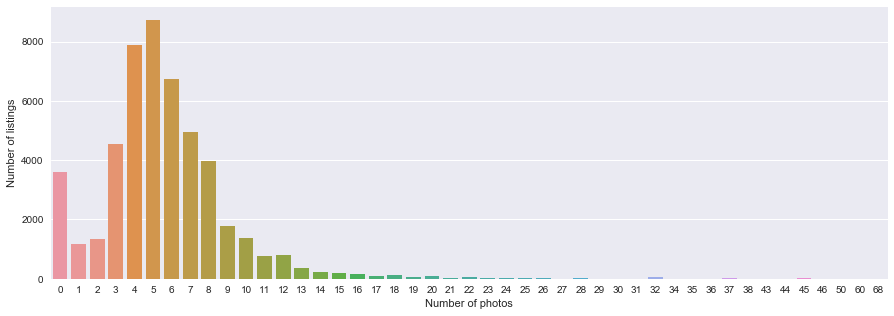

In [25]:
photos = housing['num_photos'].value_counts()

plt.figure(figsize=(15,5))
sns.barplot(photos.index, photos.values)
plt.ylabel('Number of listings')
plt.xlabel('Number of photos')
plt.show()

Thus from the above graph and code we can notice that there are 3615 entries (approx 7.2 % entries) where there are no photos mentioned in the listing.

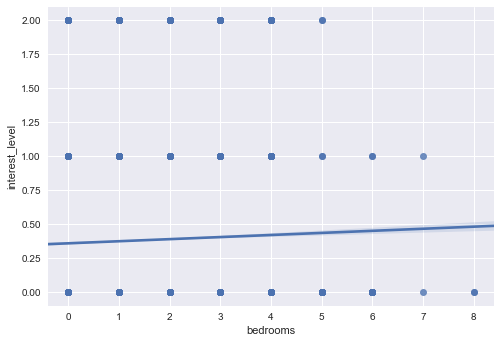

In [36]:
sns.regplot(y="interest_level", x="bedrooms", data=housing, fit_reg = True)
#plt.scatter(housing.bedrooms,housing.interest_level)
plt.show()